<a href="https://colab.research.google.com/github/SimonovBlonsky/DL_Learn/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

创建一个模型类，继承nn.Module

In [48]:
class Model(nn.Module):
  # 输入层(4个特征) --> 隐藏层H1,H2 --> 输出层(3个类)
  def __init__(self, in_features=4, h1=5, h2=8, h3=10, out_features=3):
    super().__init__() # 实例化nn.Module
    self.fc1 = nn.Linear(in_features, h1) # fc表示fully connected, 全连接层
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)
  # 前向传播
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

In [26]:
# 手动选择随机种子
torch.manual_seed(1)
model = Model()

In [27]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [28]:
# 将数据集的variety改成整型
my_df['variety'] = my_df['variety'].replace("Setosa", 0.0)
my_df['variety'] = my_df['variety'].replace("Versicolor", 1.0)
my_df['variety'] = my_df['variety'].replace("Virginica", 2.0)

In [29]:
# 训练和测试集分割
X = my_df.drop('variety',axis=1) #由于要输入特征，需要把y值（标签）去除掉，axis=1是因为去掉一整列
Y = my_df['variety']

In [30]:
# 转换为numpy arrays
X = X.values
Y = Y.values

In [31]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
# 将X的特征转换未float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [67]:
# 设置损失函数
criterion = nn.CrossEntropyLoss()
# 选择Adam优化器，设置学习率
optimizer = torch.optim.Adam(model.parameters(),lr=0.012)

In [68]:
# 训练模型
epochs = 200
losses = []
for i in range(epochs):
  # 前向传播
  Y_pred = model.forward(X_train) # 预测值
  # 计算loss
  loss = criterion(Y_pred, Y_train)
  # 记录loss
  losses.append(loss.detach().numpy())
  # 输出10epoch当中
  if i % 10 == 0:
    print(f'Epoch:{i} and loss {loss}')
  # 反向传播
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss 0.19010886549949646
Epoch:10 and loss 0.16291721165180206
Epoch:20 and loss 0.0797017440199852
Epoch:30 and loss 0.07265189290046692
Epoch:40 and loss 0.06836216896772385
Epoch:50 and loss 0.06351201236248016
Epoch:60 and loss 0.05892978981137276
Epoch:70 and loss 0.05552816390991211
Epoch:80 and loss 0.052974630147218704
Epoch:90 and loss 0.050936903804540634
Epoch:100 and loss 0.049441736191511154
Epoch:110 and loss 0.048408105969429016
Epoch:120 and loss 0.047731172293424606
Epoch:130 and loss 0.04732056334614754
Epoch:140 and loss 0.047088105231523514
Epoch:150 and loss 0.046964701265096664
Epoch:160 and loss 0.046900611370801926
Epoch:170 and loss 0.04686587676405907
Epoch:180 and loss 0.04684404283761978
Epoch:190 and loss 0.046827372163534164


Text(0.5, 0, 'Epoch')

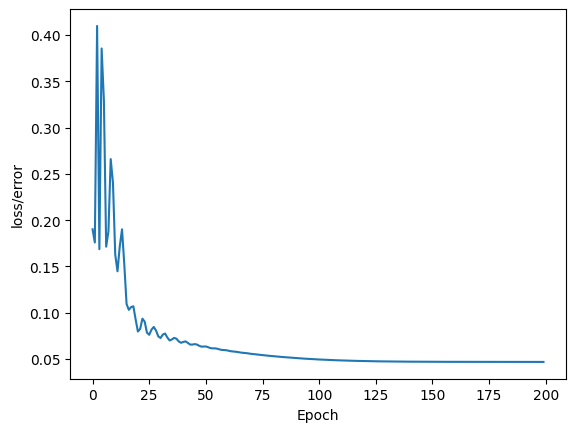

In [69]:
# 画图
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [70]:
# 验证
with torch.no_grad(): # 关闭反向传播
  Y_eval = model.forward(X_test) # 根据测试集进行预测
  loss = criterion(Y_eval, Y_test) # Find the loss or error

In [71]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    # 逐个预测
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {Y_test[i]}')
    # 数一下有几个对了
    if y_val.argmax().item() == Y_test[i]:
      correct +=1
print(f'we get {correct}/{Y_test.size()} correct!')
print(loss)

1.) tensor([-20.3274,   6.6405,  -1.7854]) 	 1
2.) tensor([ 16.7016,  -7.1299, -14.8061]) 	 0
3.) tensor([-85.6979,   5.2571,  22.6417]) 	 2
4.) tensor([-2.3777e+01,  6.0313e+00, -1.9656e-02]) 	 1
5.) tensor([-25.9372,   6.4582,   0.1634]) 	 1
6.) tensor([ 16.4405,  -7.0401, -14.4468]) 	 0
7.) tensor([-12.7283,   7.2029,  -4.2508]) 	 1
8.) tensor([-51.4956,   4.0981,  11.5367]) 	 2
9.) tensor([-32.7134,   5.3037,   3.7937]) 	 1
10.) tensor([-14.2031,   7.2441,  -3.9692]) 	 1
11.) tensor([-42.4477,   4.5272,   7.9160]) 	 2
12.) tensor([ 16.1393,  -6.9366, -14.0324]) 	 0
13.) tensor([ 16.5309,  -7.0712, -14.5712]) 	 0
14.) tensor([ 16.2217,  -6.9649, -14.1458]) 	 0
15.) tensor([ 16.2853,  -6.9868, -14.2333]) 	 0
16.) tensor([-24.0079,   6.2185,  -0.1759]) 	 1
17.) tensor([-61.7699,   4.3172,  15.1785]) 	 2
18.) tensor([-14.0935,   7.1457,  -3.9057]) 	 1
19.) tensor([-20.3095,   6.2735,  -1.3823]) 	 1
20.) tensor([-61.3413,   4.2741,  15.1041]) 	 2
21.) tensor([ 16.0825,  -6.9171, -13.954